> About the dataset:

>>  The data contains vehicle data (speed, throttle etc.), battery data (voltage, current, temp., state of charge [SOC]) and heating data.

>> The data was recorded in winter (category B) and contains all measurd data.



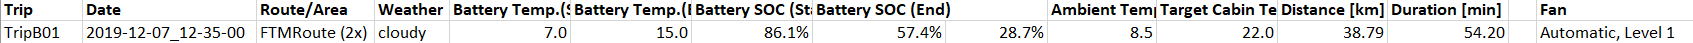

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
#df = pd.read_csv('TripB01.csv', encoding = 'unicode_escape', delimiter = ';')
#df.columns.tolist()

In [49]:
data = pd.read_csv('sample_data.csv')
print(data.shape)
data.sample(5)

(32518, 4)


,Time [s],Velocity [km/h],Acceleration [m/s^2],Battery_Voltage [V]
27265,2726.5,35.85428,0.00018,375.28878
20299,2029.9,0.00000,-0.08200,380.78559
14060,1406.0,26.95560,-0.36724,382.14820
10779,1077.9,104.80477,-0.12513,373.90000
24456,2445.6,49.40983,3.21546,351.87738


In [50]:
data['Time [s]'] = pd.to_datetime(data['Time [s]'])
data['Time [s]'] = data.index
data.dtypes

,0
Time [s],int64
Velocity [km/h],float64
Acceleration [m/s^2],float64
Battery_Voltage [V],float64


In [51]:
#plt.plot(data['Time [s]'], data['Acceleration [m/s^2]'])

df = data.drop('Time [s]', axis = 1)
df.sample(5)

,Velocity [km/h],Acceleration [m/s^2],Battery_Voltage [V]
29150,104.85669,-0.65201,375.35248
22856,26.73578,-1.13180,382.73847
26937,85.00172,-0.29311,371.56472
9759,26.32555,-0.44481,386.06142
16681,28.35122,-1.46451,385.48916


Text(0.5, 0, 'Time (seconds)')

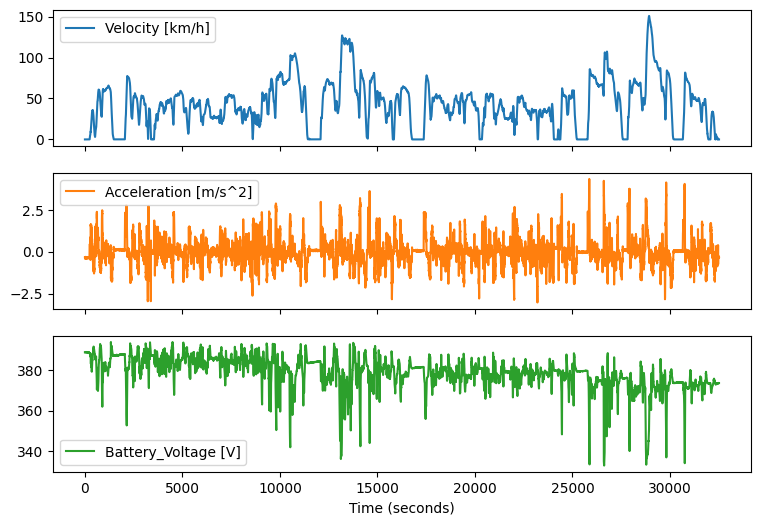

In [52]:
df.plot(subplots = True, figsize = (9, 6))
plt.xlabel('Time (seconds)')

In [73]:
#Determine Features

N = data.shape[0]  #length of the array = number of samples
time = data['Time [s]']
Fs = 1/(time[1]- time[0]) 	#sample rate (Hz)
T = 1/Fs
accel = df['Acceleration [m/s^2]']

In [74]:
print(N, Fs, T)

32518 1.0 1.0


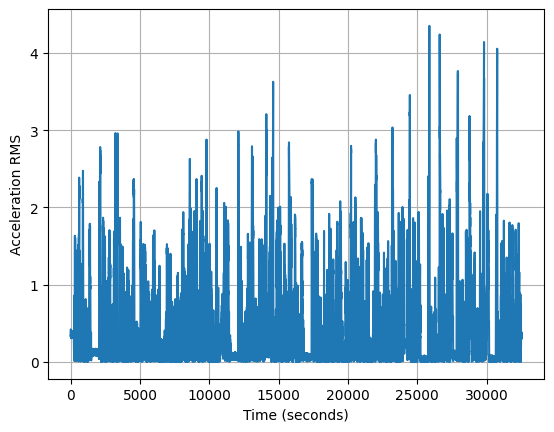

In [75]:
#Compute RMS & Plot

w = np.floor(Fs)                #width of the window for computing RMS
w = w.astype(int)
steps = np.int_(np.floor(N/w)); #number of steps for RMS
t_RMS = np.zeros((steps, 1))     #create array for RMS time values
x_RMS = np.zeros((steps, 1))     #create array for RMS values
for i in range (0, steps):
	t_RMS[i] = np.mean(time[(i*w):((i+1)*w)]);
	x_RMS[i] = np.sqrt(np.mean(accel[(i*w):((i+1)*w)]**2));
plt.figure()
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration RMS')
#plt.title('Acceleration RMS with time')
plt.grid()

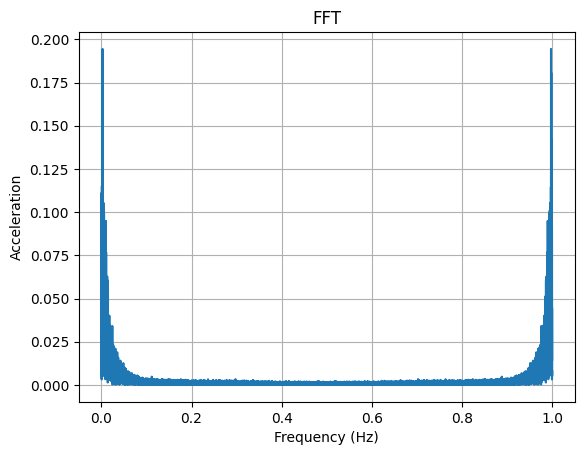

In [76]:
#Compute FFT and Plot

plt.figure()
xf = np.linspace(0, (1/T).astype(int), int(N))
yf = scipy.fftpack.fft(np.array(accel))
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Acceleration')
plt.title('FFT')
plt.show()